$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Linear Regression on Yacht Hydrodynamics Data

## Overview

The objective of this project is to apply linear regression model to Yacht Hydrodynamics Dataset (taken from UCI machine Learning Repository).

This data set consists of 7 attributes and 308 full-scale experiments, which were performed at the Delft Ship Hydromechanics Laboratory. I have used the linear model where I took 80% of the samples of input data to train the model and then tested the model using the remaining 20% of the data and then compared the data with the known desired outputs. This method has minimized the sum of squared errors.

# Method

The dataset is first loaded into a variable known as data and then we separate the Target values into T and the remaining data into X. Then we try to fit a linear model to all of the data to see how accurately we predict the residuary resistance for each sample. To do this we define three functions:
1. model = train(X,T)
2. predict = use(model,X)
3. error = rmse(predict,T)


In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

We first use the train method to find the weights of each of the attribute. This method returns a model which consists of the set of  keys < mean, standard deviation, weight>. 
To find weight matrix, we use the formula : 
$$
\begin{align*}
\wv &= (\Xv^T \Xv)^{-1} \Xv^T \Tv
\end{align*}
$$

But the weight matrix we obtain is not standardized. So we first standardize the values by using the following formula and then applying the above formula

$$
\begin{align*}
\Xv &= \frac{\Xv - m }{s}
\end{align*}
$$

where, m is the mean ,
       s is the standard deviation.

In [7]:
def train(X,T):
    means = np.mean(X,axis = 0)
    stds = np.std(X, axis = 0)
    Xs = (X - means) / stds
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)),Xs))
    w = np.linalg.lstsq(np.dot(Xs1.T,Xs1), np.dot(Xs1.T, T))[0]
    return {'means':means, 'stds':stds, 'w':w}

Now we use this weight obtained from the above train() method in the use() method to get the predicted values of the model. In this method, we use the same mean and standard deviation as above.

In [8]:
def use(model, X):
    mean = model['means']
    std = model['stds']
    Xs = (X - mean) / std
    Xs1 = np.hstack((np.ones((Xs.shape[0],1)),Xs))
    new_w = model['w']
    predict = np.dot( Xs1,new_w )
    return predict

Now we take these predicted values and compare them with the Target values to find the error. We find the RMSE(Root Mean Square Error) for the Predicted values and the Target values as follows:
1. We First find the error using the formula: error = Predicted - T
2. Now we find the square of error value
3. Then we find the mean of the obtained square value
4. Now we find the root of the mean

$$
\begin{align*}
rmse &= \sqrt{\frac{\sum_{n=1}^N (Predict - T)^2}{N}}
\end{align*}
$$

In [9]:
def rmse(predict, T):
    error = predict - T
    square = error ** 2
    mean = np.mean(square)
    root = np.sqrt(mean)
    return root

The RMSE value indicates the absolute fit of the model to the data – how close the observed data points are to the model’s predicted values.


## Data

The data used is taken from UCI Machine Learning Repository. 
http://archive.ics.uci.edu/ml/datasets/Yacht+Hydrodynamics

The creator of the data source is : Ship Hydromechanics Laboratory, Maritime and Transport Technology Department, Technical University of Delft and the Donor is Dr.Roberto Lopez.

The Delft data set comprises 7 attributes and 308 full-scale experiments, which were performed at the Delft Ship Hydromechanics Laboratory for that purpose. 

1. Longitudinal position of the center of buoyancy. 
2. Prismatic coefficient. 
3. Length-displacement ratio. 
4. Beam-draught ratio. 
5. Length-beam ratio. 
6. Froude number. 

The measured variable is the residuary resistance per unit weight of displacement: 

1. Residuary resistance per unit weight of displacement. 

The data can be viewed using the following statements:

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
data = np.loadtxt('Concrete_Data.csv',delimiter = ',',skiprows=1)
data

array([[ -2.3  ,   0.568,   4.78 , ...,   3.17 ,   0.125,   0.11 ],
       [ -2.3  ,   0.568,   4.78 , ...,   3.17 ,   0.15 ,   0.27 ],
       [ -2.3  ,   0.568,   4.78 , ...,   3.17 ,   0.175,   0.47 ],
       ..., 
       [ -2.3  ,   0.6  ,   4.34 , ...,   2.73 ,   0.4  ,  19.59 ],
       [ -2.3  ,   0.6  ,   4.34 , ...,   2.73 ,   0.425,  30.48 ],
       [ -2.3  ,   0.6  ,   4.34 , ...,   2.73 ,   0.45 ,  46.66 ]])

We can also visualize this data by plotting each value in a seperate graph. Lets first make an array of column names to label the y-axis

In [26]:
#names =  ['longitudinal Position','Prismatic Coefficient','Length-Displacement Ratio','Beam-draught ratio',
 #         'length-beam ratio','froude number','Residuary Resistence']

Now we plot all of them individually on graphs

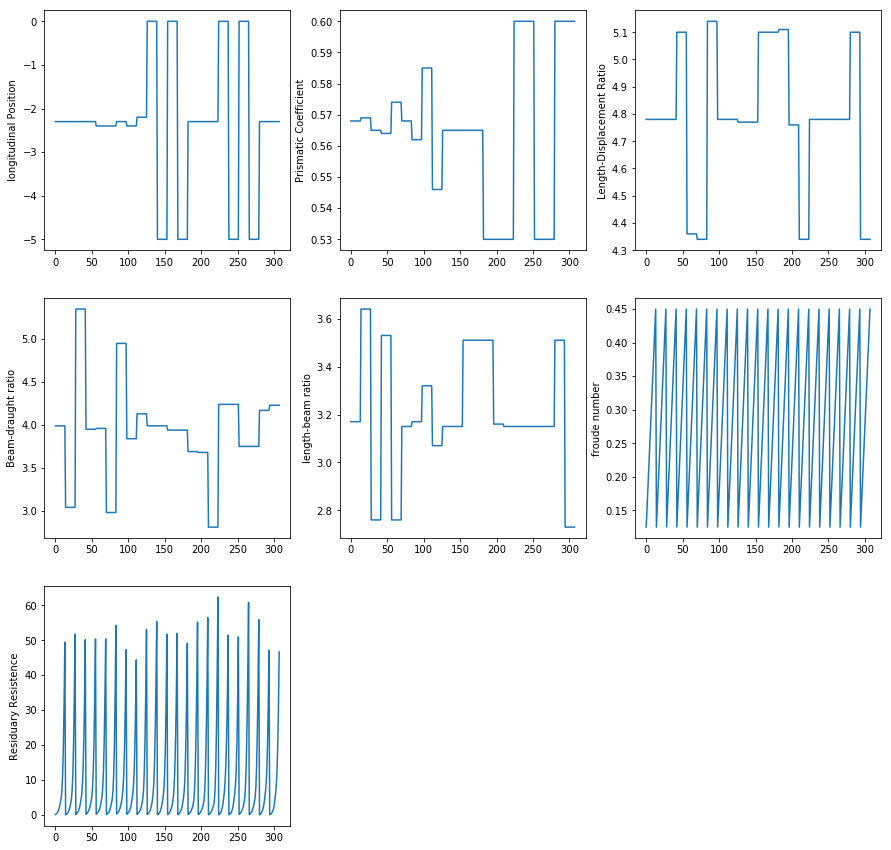

In [27]:
plt.figure(figsize=(15,15))
nrow,ncol = data.shape
for c in range(ncol):
    plt.subplot(3,3, c+1)
    plt.plot(data[:,c])
   # plt.ylabel(names[c])

We can also see if the linear model makes sense by plotting all the attributes against the measuring variable.

In [28]:
X = data[:,0:9]
T = data[:,8:9]

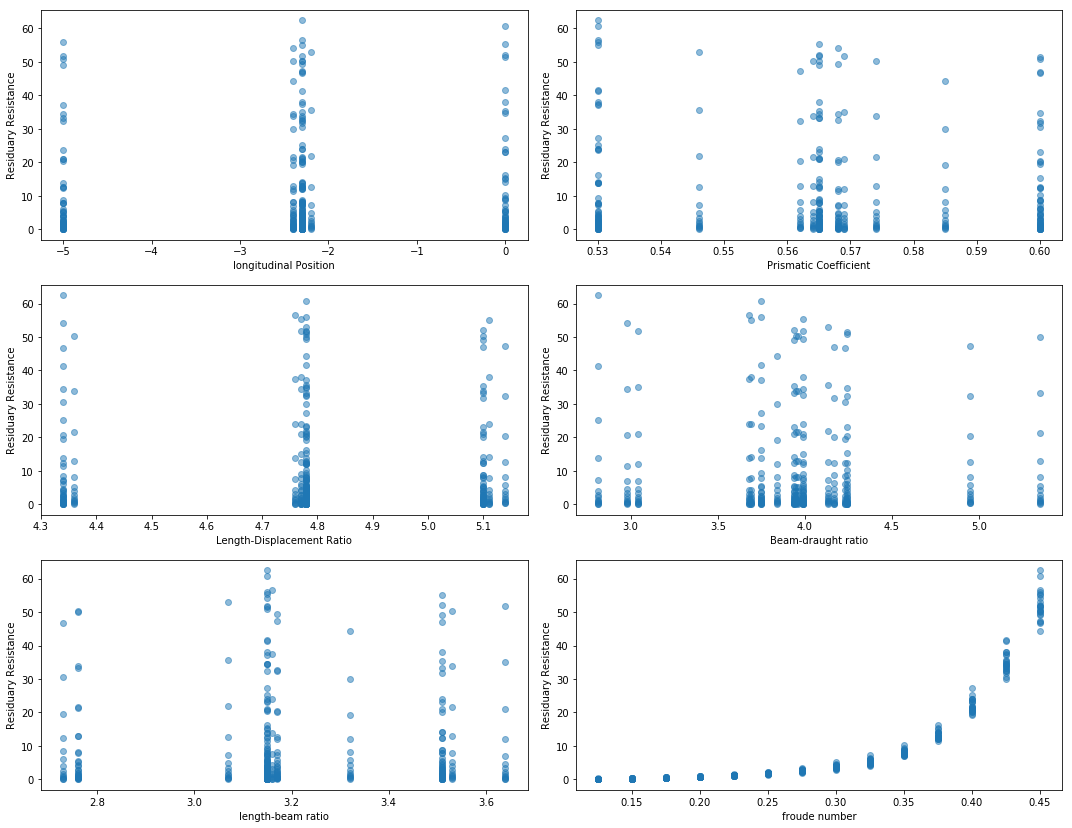

In [29]:
plt.figure(figsize=(15,15))
nrow,ncol = X.shape
for c in range(ncol):
    plt.subplot(4,2, c+1)
    plt.plot(X[:,c],T,'o',alpha = 0.5)
    plt.ylabel('Residuary Resistance')
    plt.xlabel(names[c])
plt.tight_layout()

From the above plotted graphs, we can see that with the increase in the froude number, the residuary resistance also increases and the other attributes may not be helpful in fitting the linear model.

## Results

To get the results, we use the above mentioned 3 methods as follows:

We first derive a model by calling 

In [30]:
model = train(X, T)

In [31]:
predict = use(model, X)

In [32]:
error = rmse(predict, T)

In [33]:
error

8.8572088390691608

But this gives us an optimistic expectation of how the model will do. So instead of taking the entire data, training it and then using the same data, we can use the concept of Test and Train. 

So now we first partition the data into two samples Test and Train where Train consists of 80% of the data and Test consists of 20% of the data.

In [34]:
nrow,ncol = X.shape
Xtrain = X[:int(round(nrow*0.8))]
Xtest = X[int(round(nrow*0.8)):]

Ttrain = T[:int(round(nrow*0.8))]
Ttest = T[int(round(nrow*0.8)):]

Now we first train the model using the Xtrain,Ttrain values and then we take the obtained weights and Xtest values and then find the predicted values using the use() method

In [35]:
NewModel = train(Xtrain,Ttrain)
NewPredict = use(NewModel,Xtest)

We now find the error using the new predicted value

In [36]:
NewError = rmse(NewPredict,Ttest)
NewError

9.1718488210117854

The error we obtained is more than the optimistic method which means that the model used is not a good fit. We now plot a graph of the Xtest values with the new predicted values (NewPredict)

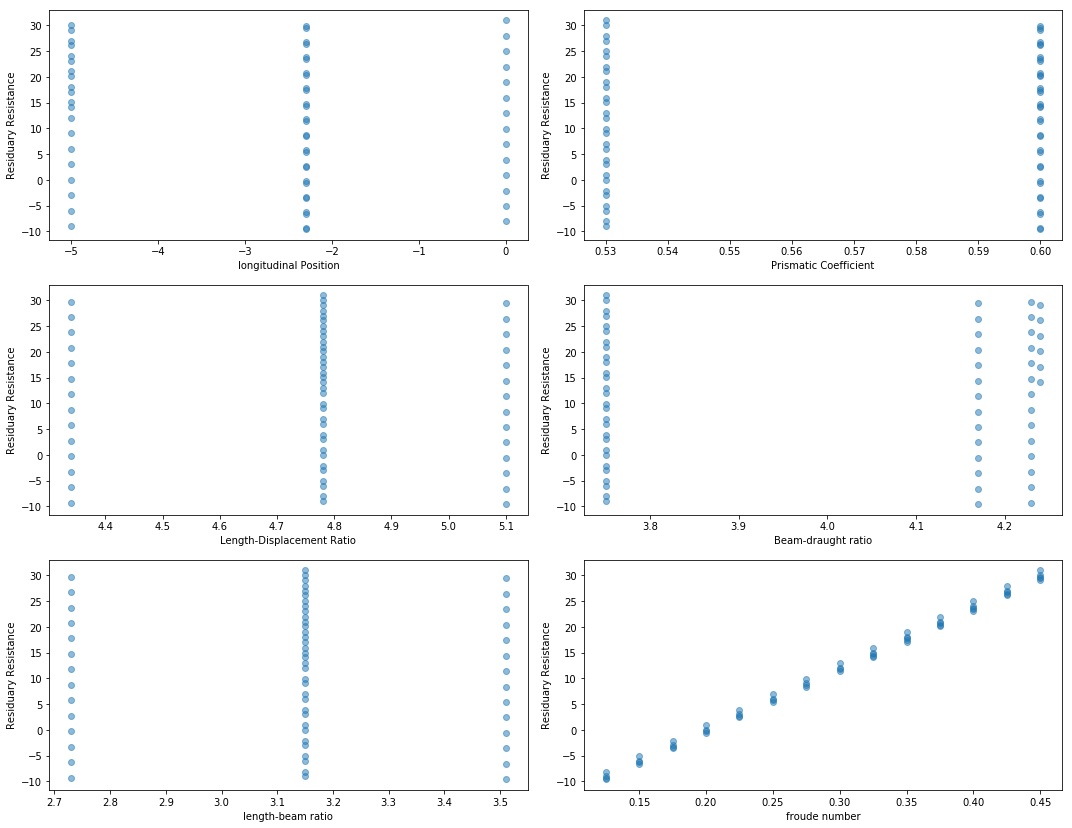

In [37]:
plt.figure(figsize=(15,15))
nrow,ncol = Xtest.shape
for c in range(ncol):
    plt.subplot(4,2, c+1)
    plt.plot(Xtest[:,c],NewPredict,'o',alpha = 0.5)
    plt.ylabel('Residuary Resistance')
    plt.xlabel(names[c])
plt.tight_layout()

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$